<a name='header'></a>

In [75]:
##Pandas
import pandas as pd
import numpy as np
import random
import pickle
#pd.read_csv('archive.zip',compression='zip')
# !cd archive&&ls
# !cd ..
import os
path='./archive/'
files=os.listdir(path)
full_path=path +files[0]

#pd.read_csv(full_path)
old_seasons=pd.read_csv(path+files[0])
last_season=pd.read_csv(path+files[1])
#checking they both have the same columns
print(len(set(last_season.columns)-set(old_seasons.columns)))
set(last_season.columns)-set(old_seasons.columns) == set(old_seasons.columns)-set(last_season.columns)

#Concatenate df

print(old_seasons.shape, last_season.shape)
print(old_seasons.shape[0]+last_season.shape[0])
football=pd.concat([old_seasons,last_season])
football.head()

0
(92170, 120) (2729, 120)
94899


,PlayerID,Player,Squad,League,Nation,Pos,Age,Born,Season,MP,...,The Best FIFA Mens Player,UEFA Best Player,UCL_MP,UCL_Gls,UCL_xG,UCL_Ast,UCL_xA,UCL_KP,UCL_GCA,UCL_SCA
0,4,Alexander Strehmel,Stuttgart,Bundesliga,GER,"DF,MF",24.0,1968.0,1992-1993,20.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,Alexander Strehmel,Stuttgart,Bundesliga,GER,"DF,MF",25.0,1968.0,1993-1994,13.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,Alexander Strehmel,Unterhaching,Bundesliga,GER,"DF,MF",31.0,1968.0,1999-2000,25.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Alexander Strehmel,Unterhaching,Bundesliga,GER,"DF,MF",32.0,1968.0,2000-2001,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,Alois Reinhardt,Bayern Munich,Bundesliga,GER,DF,30.0,1961.0,1992-1993,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


1. MP – Matches played
2. Min – Minutes played
3. Mn/MP – Minutes per match (average)
4. Min% – Percentage of team minutes played
5. Starts – Matches started
6. Mn/Start – Minutes per start
7. Subs – Appearances as a substitute
8. Mn/Sub – Minutes per substitute appearance
9. unSub – Unsubstituted appearances (played full match)
10. 90s – Minutes played expressed in 90-minute units



1. PlayerID – Unique identifier for the player
2. Player – Player's full name
3. Squad – Team/club the player belongs to
4. League – League in which the player competes
5. Nation – Player's nationality
6. Pos – Playing position (e.g., FW, MF, DF)
7. Age – Age during the season
8. Born – Year of birth
9. Season – Season of the data (e.g., 2022-2023)


In [109]:
football.shape
#NoNULLS
football.isnull().sum().sum()
columns1=['PlayerID',
'Player' ,
'Squad' ,
'League' ,
'Nation' ,
'Pos' ,
'Age' ,
'Born',
'Season']


columns2=['MP',
'Min',
'Mn/MP',
'Min%',
'Starts',
'Mn/Start',
'Subs',
'Mn/Sub',
'unSub',
'90s' ]
columns_=columns2 +columns1
foot=football[columns_].copy()
foot.columns=[col.lower().replace(' ','_') for col in foot.columns]
foot.dtypes

mp          float64
min         float64
mn/mp       float64
min%        float64
starts      float64
mn/start    float64
subs        float64
mn/sub      float64
unsub       float64
90s         float64
playerid      int64
player       object
squad        object
league       object
nation       object
pos          object
age         float64
born        float64
season       object
dtype: object

In [140]:
foot.head()
season_test=foot.season.iloc[3]
int(season_test.split('-')[0])
def extracting_year(row):
    '''
    Takes the season value an extracts the first year
    '''
    
    return int(row['season'].split('-')[0])
foot['year_season']=foot.apply(extracting_year,axis=1)
foot=foot[foot.year_season<2025].copy()
foot.head()

,mp,min,mn/mp,min%,starts,mn/start,subs,mn/sub,unsub,90s,playerid,player,squad,league,nation,pos,age,born,season,year_season
0,20.0,1425.0,71.0,46.6,15.0,0.0,5.0,0.0,0.0,15.8,4,Alexander Strehmel,Stuttgart,Bundesliga,GER,"DF,MF",24,1968.0,1992-1993,1992
1,13.0,967.0,74.0,31.6,11.0,0.0,2.0,0.0,0.0,10.7,4,Alexander Strehmel,Stuttgart,Bundesliga,GER,"DF,MF",25,1968.0,1993-1994,1993
2,25.0,2231.0,89.0,72.9,25.0,0.0,0.0,0.0,0.0,24.8,4,Alexander Strehmel,Unterhaching,Bundesliga,GER,"DF,MF",31,1968.0,1999-2000,1999
3,32.0,2880.0,90.0,94.1,32.0,0.0,0.0,0.0,0.0,32.0,4,Alexander Strehmel,Unterhaching,Bundesliga,GER,"DF,MF",32,1968.0,2000-2001,2000
4,5.0,216.0,43.0,7.1,2.0,0.0,3.0,0.0,0.0,2.4,6,Alois Reinhardt,Bayern Munich,Bundesliga,GER,DF,30,1961.0,1992-1993,1992


In [141]:
#The youngest player
foot['age']=foot['age'].astype(int)
foot[foot.age==foot.age.min()][['player','squad','age']]

,player,squad,age
42539,Luka Romero,Mallorca,14
89656,Emanuel Ercolano,Sampdoria,14
90994,Wisdom Amey,Bologna,14
92145,Roberto Scaglione,Genoa,14


In [142]:
foot[foot.age==foot.age.max()][['player','squad','age']]

,player,squad,age
79290,Marco Ballotta,Lazio,43


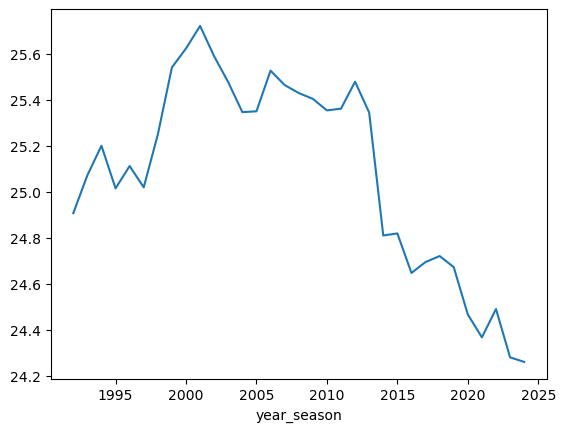

In [143]:
foot.groupby('year_season')['age'].mean().plot();

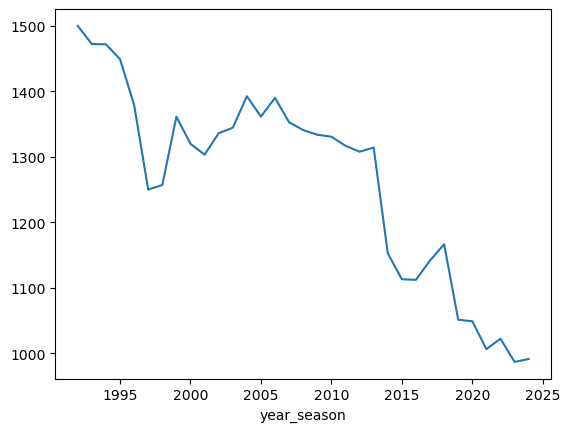

In [144]:
foot.groupby('year_season')['min'].mean().plot();

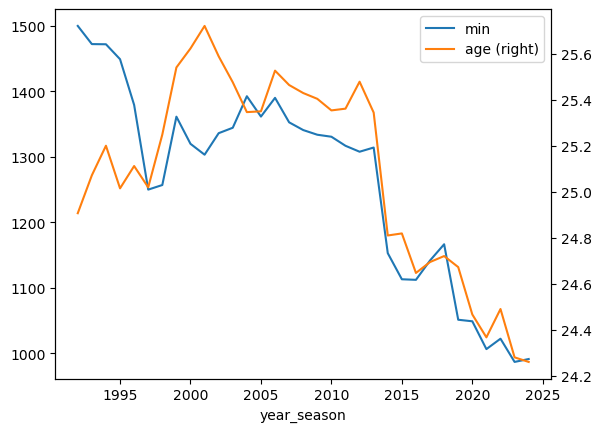

In [147]:
foot.groupby('year_season')[['min','age']].mean().plot(secondary_y='age');

<Axes: xlabel='year_season'>

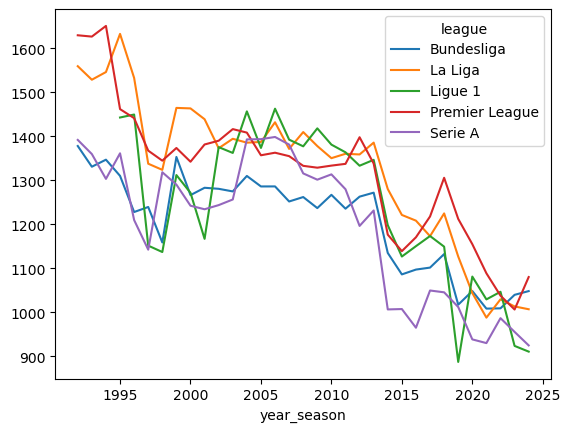

In [151]:
foot.groupby(['year_season','league'])['min'].mean().unstack().plot()